## Classification for 2 classes  

# Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read dataset

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart_disease_uci.csv')

In [ ]:
df.head()

id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0

understanding the data information and types

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  861.000000  890.000000  865.000000  858.000000   
mean   460.500000   53.510870  132.132404  199.130337  137.545665    0.878788   
std    265.725422    9.424685   19.066070  110.780810   25.926276    1.091226   
min      1.000000   28.000000    0.000000    0.000000   60.000000   -2.600000   
25%    230.750000   47.000000  120.000000  175.000000  120.000000    0.000000   
50%    460.500000   54.000000  130.000000  223.000000  140.000000    0.500000   
75%    690.250000   60.000000  140.000000  268.000000  157.000000    1.500000   
max    920.000000   77.000000  200.000000  603.000000  202.000000    6.200000   

               ca         num  
count  309.000000  920.000000  
mean     0.676375    0.995652  
std      0.935653    1.142693  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    1.000000  
75%      1.000000    2.000000  
max      3.000000    4.000000

# Remove unwanted features
Because the id feature is similar to the index. So we remove it..

In [ ]:
df.drop(['id'], axis = 1, inplace=True)

# Target feature
The target feature is converted to a binary feature with numbers 0 and 1. We assume that any person who has heart disease is only represented by the number 1 and not by 0, so any number greater than 1 is equal to 1.

In [ ]:
df['num'].value_counts()

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

In [ ]:
df['num'] = np.where(df['num'] >= 1 , 1, 0)

# Rename the target feature with an aproperiate name

In [ ]:
df.rename(columns={'num': 'heart_diseas'}, inplace=True)


# Visualizing the target feature
Since the difference between class 0 and class 1 is not more and not less than 30% relative to each other, the target feature does not appear to be unbalanced.

<Axes: xlabel='heart_diseas'>

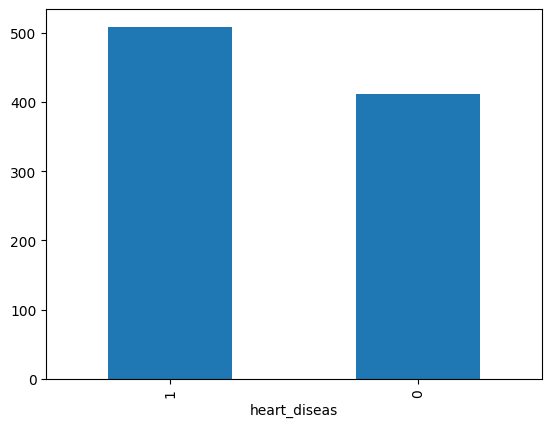

In [ ]:
df['heart_diseas'].value_counts().plot.bar()

# Visualisation of numeric features before removing outliers
Using the box plot, we can explore the outlier of each feature.

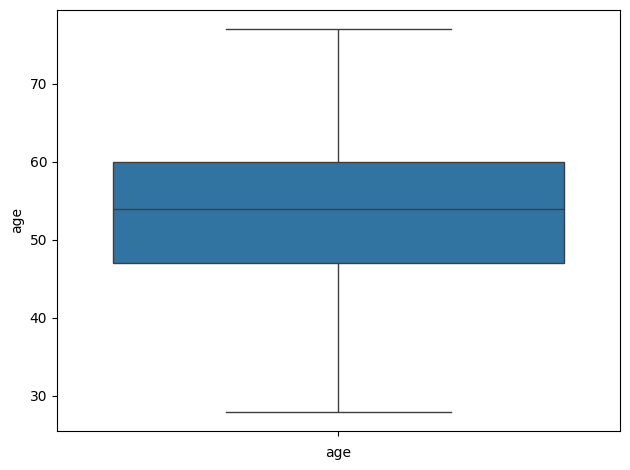

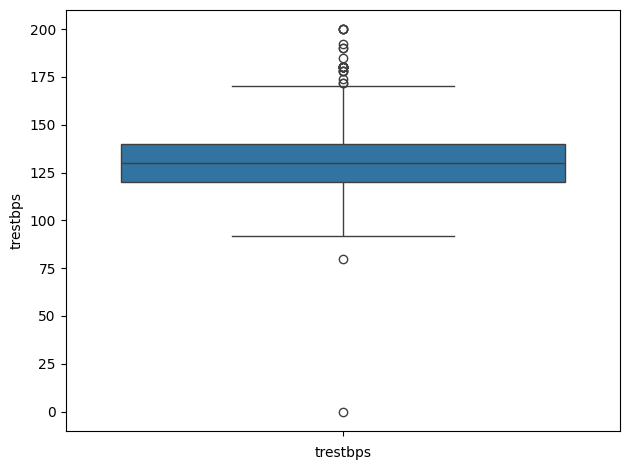

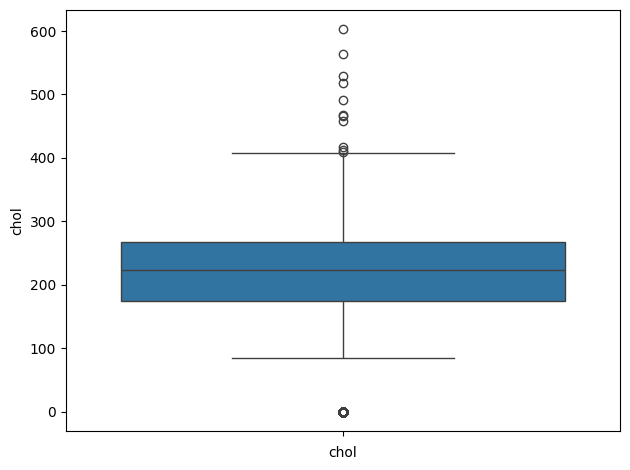

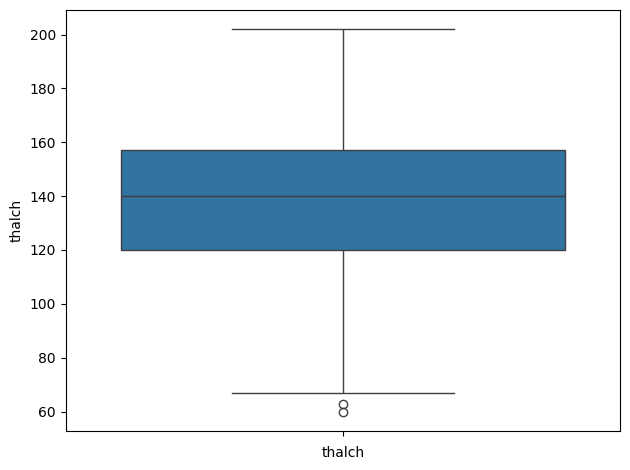

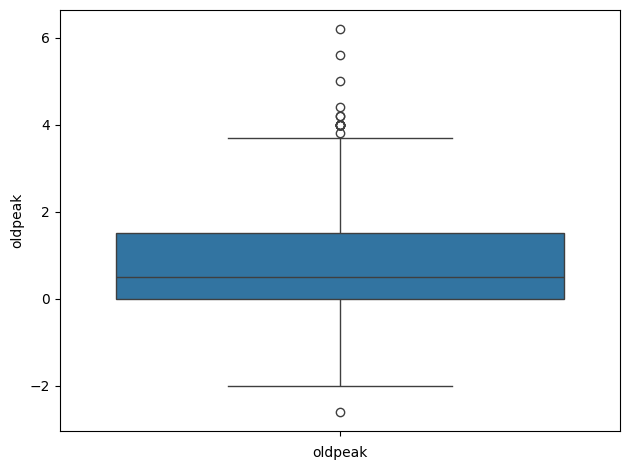

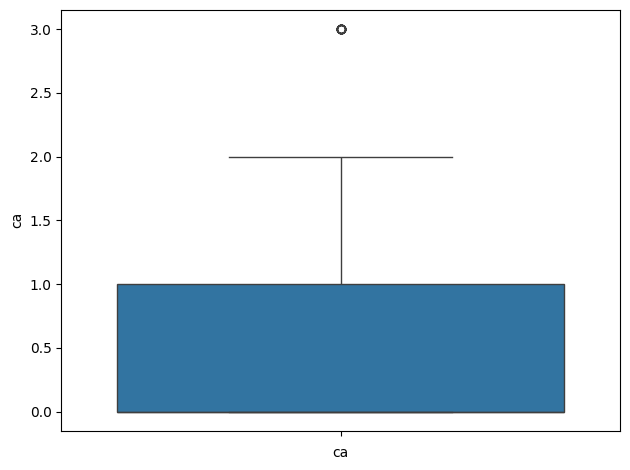

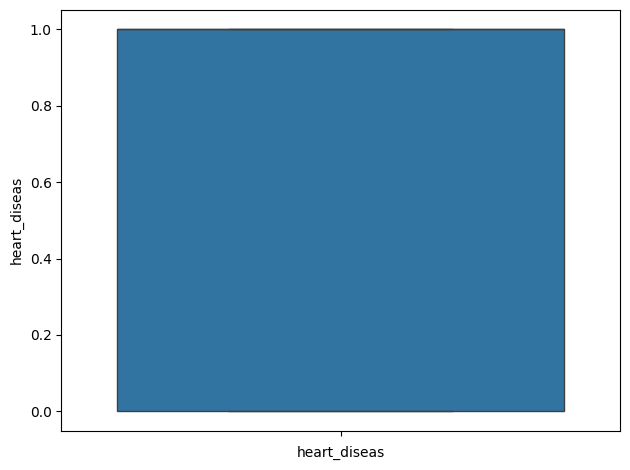

In [ ]:
for col in df.select_dtypes(include=['int', 'float']).columns:
  sns.boxplot(df, y = col)
  plt.xlabel(col)
  plt.tight_layout()
  plt.show()

# **Remove outliers**

In [ ]:
def removing_outli(df):
  d =pd.DataFrame()
  for col in df.columns:
    if (df[col].dtype != 'object') and  (df[col].dtype != 'bool'):
      attr = col
      print(attr)
      Q = df[attr].quantile([.25, .75], interpolation='nearest')
      Q1 = Q.iloc[0]
      Q3 = Q.iloc[1]
      L= Q1-1.5*(Q3-Q1)
      U = Q3 + 1.5*(Q3-Q1)
      col = df[[attr]]
      d[attr] = (col[( col < U) & (col > L)])
    else:
      d[col] = df[col]
  return d

new_df = removing_outli(df)
new_df.reset_index(drop=True)

age
trestbps
chol
thalch
oldpeak
ca
heart_diseas


age     sex        dataset               cp  trestbps   chol    fbs  \
0     63    Male      Cleveland   typical angina     145.0  233.0   True   
1     67    Male      Cleveland     asymptomatic     160.0  286.0  False   
2     67    Male      Cleveland     asymptomatic     120.0  229.0  False   
3     37    Male      Cleveland      non-anginal     130.0  250.0  False   
4     41  Female      Cleveland  atypical angina     130.0  204.0  False   
..   ...     ...            ...              ...       ...    ...    ...   
915   54  Female  VA Long Beach     asymptomatic     127.0  333.0   True   
916   62    Male  VA Long Beach   typical angina       NaN  139.0  False   
917   55    Male  VA Long Beach     asymptomatic     122.0  223.0   True   
918   58    Male  VA Long Beach     asymptomatic       NaN  385.0   True   
919   62    Male  VA Long Beach  atypical angina     120.0  254.0  False   

              restecg  thalch  exang  oldpeak        slope   ca  \
0      lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1      lv hypertrophy   108.0   True      1.5         flat  NaN   
2      lv hypertrophy   129.0   True      2.6         flat  2.0   
3              normal   187.0  False      3.5  downsloping  0.0   
4      lv hypertrophy   172.0  False      1.4    upsloping  0.0   
..                ...     ...    ...      ...          ...  ...   
915  st-t abnormality   154.0  False      0.0          NaN  NaN   
916  st-t abnormality     NaN    NaN      NaN          NaN  NaN   
917  st-t abnormality   100.0  False      0.0          NaN  NaN   
918    lv hypertrophy     NaN    NaN      NaN          NaN  NaN   
919    lv hypertrophy    93.0   True      0.0          NaN  NaN   

                  thal  heart_diseas  
0         fixed defect             0  
1               normal             1  
2    reversable defect             1  
3               normal             0  
4               normal             0  
..                 ...           ...  
915                NaN             1  
916                NaN             0  
917       fixed defect             1  
918                NaN             0  
919                NaN             1  

[920 rows x 15 columns]

# Boxplot after removing outliers

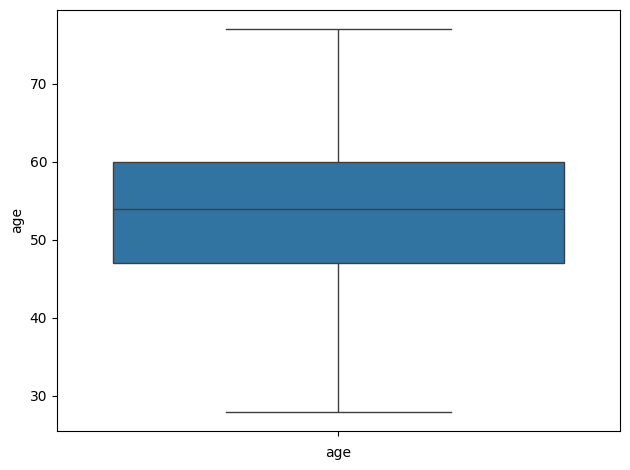

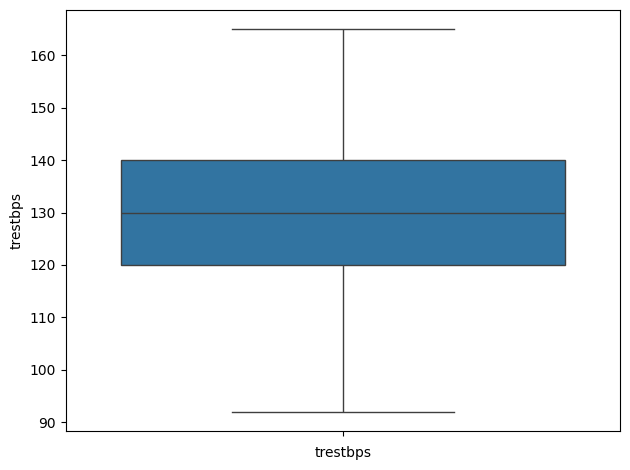

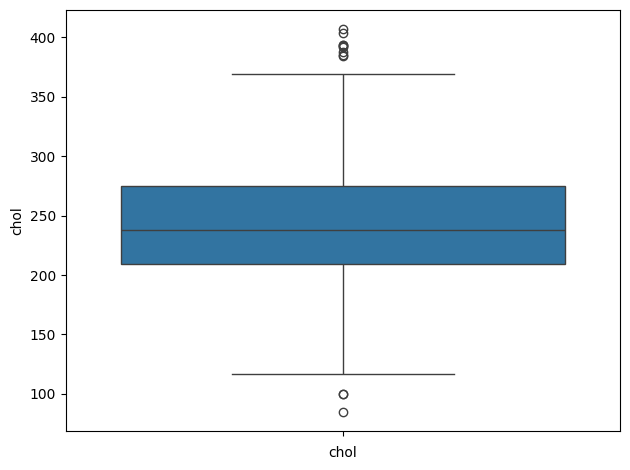

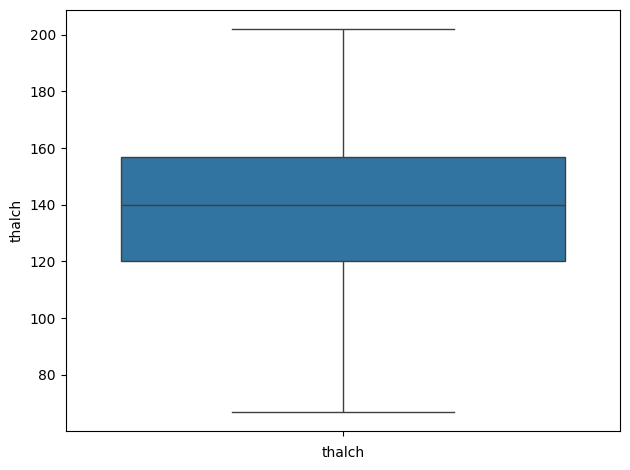

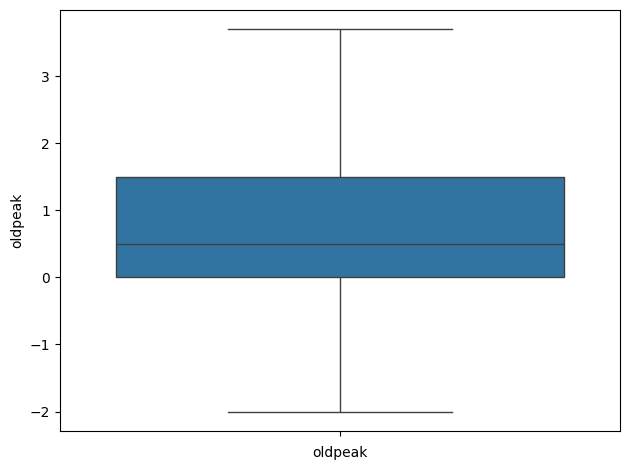

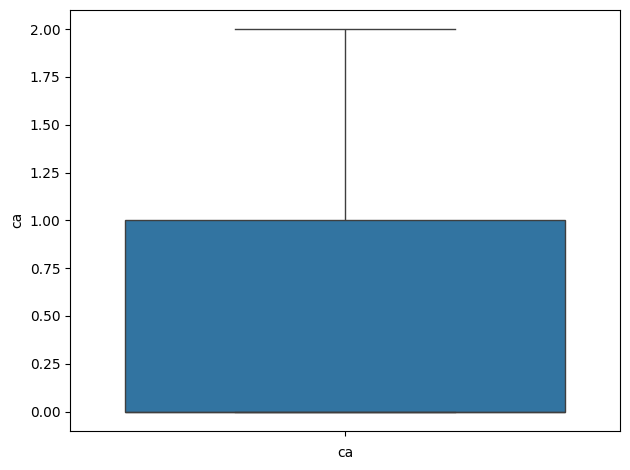

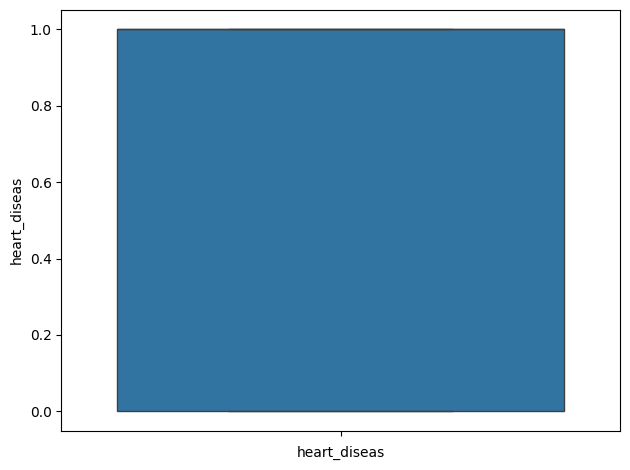

In [ ]:
for col in new_df.select_dtypes(include=['int', 'float']).columns:
  sns.boxplot(new_df, y = col)
  plt.xlabel(col)
  plt.tight_layout()
  plt.show()

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           920 non-null    int64  
 1   sex           920 non-null    object 
 2   dataset       920 non-null    object 
 3   cp            920 non-null    object 
 4   trestbps      819 non-null    float64
 5   chol          707 non-null    float64
 6   fbs           830 non-null    object 
 7   restecg       918 non-null    object 
 8   thalch        863 non-null    float64
 9   exang         865 non-null    object 
 10  oldpeak       842 non-null    float64
 11  slope         611 non-null    object 
 12  ca            289 non-null    float64
 13  thal          434 non-null    object 
 14  heart_diseas  920 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 107.9+ KB


# Replac ca feature again
Because the number of large vessels is changed from 0 to 3, it is considered as an outlier in the above quantizer method. However, this is not an outlier. Therefore, we will add this feature again to the new df from the old df. After running the model and taking the initial prediction result, it is better to convert this feature from numeric to binary by 0 and 1, so that 0 represents no blood vessel disease while 1 represents blood vessel disease.

In [ ]:
new_df['ca'] = np.where(df['ca'] >=1, 1, 0)

# Missing values


In [ ]:
nan= []
for col in df.columns:
  nan.append((df[col].isna().sum()/len(df[col]))*100)
nan_value = pd.Series(nan, index=df.columns, name='nan_value(%)')
nan_value



age              0.000000
sex              0.000000
dataset          0.000000
cp               0.000000
trestbps         6.413043
chol             3.260870
fbs              9.782609
restecg          0.217391
thalch           5.978261
exang            5.978261
oldpeak          6.739130
slope           33.586957
ca              66.413043
thal            52.826087
heart_diseas     0.000000
Name: nan_value(%), dtype: float64

Identify the type of null features

In [ ]:
print('nun values features: \n', new_df[(nan_value[nan_value.values >0]).index].dtypes)
new_df[(nan_value[nan_value.values >0]).index].describe()

nun values features: 
 trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca            int64
thal         object
dtype: object


trestbps        chol      thalch     oldpeak          ca
count  819.000000  707.000000  863.000000  842.000000  920.000000
mean   130.081807  243.127298  137.721900    0.820903    0.139130
std     15.585066   50.240534   25.695867    0.985659    0.346271
min     92.000000   85.000000   67.000000   -2.000000    0.000000
25%    120.000000  209.000000  120.000000    0.000000    0.000000
50%    130.000000  238.000000  140.000000    0.500000    0.000000
75%    140.000000  275.000000  157.000000    1.500000    0.000000
max    165.000000  407.000000  202.000000    3.700000    1.000000

After the removal of outliers in some features, the place of these outlier samples is filled by the mean value, in order to avoid nan values relative to other complete features.

# Filling missing values
Fill numeric nan values with 'mean' and 'median'.

In [ ]:
new_df['trestbps'] = new_df.trestbps.fillna( new_df.trestbps.mean())
new_df['chol']= new_df.chol.fillna(new_df.chol.mean())
new_df['thalch']= new_df.thalch.fillna(new_df.thalch.mean())
new_df['oldpeak'] = new_df.oldpeak.fillna(new_df.oldpeak.median())
new_df['ca'] = new_df.ca.fillna(new_df.ca.median())

Filling nan values of object features with mode.

In [ ]:
features= ['fbs', 'restecg', 'exang', 'slope', 'thal']
for fet in features:
  new_df[fet] = new_df[fet].fillna(new_df[fet].mode()[0])

<ipython-input-15-7da22730445a>:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_df[fet] = new_df[fet].fillna(new_df[fet].mode()[0])


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           920 non-null    int64  
 1   sex           920 non-null    object 
 2   dataset       920 non-null    object 
 3   cp            920 non-null    object 
 4   trestbps      920 non-null    float64
 5   chol          920 non-null    float64
 6   fbs           920 non-null    bool   
 7   restecg       920 non-null    object 
 8   thalch        920 non-null    float64
 9   exang         920 non-null    bool   
 10  oldpeak       920 non-null    float64
 11  slope         920 non-null    object 
 12  ca            920 non-null    int64  
 13  thal          920 non-null    object 
 14  heart_diseas  920 non-null    int64  
dtypes: bool(2), float64(4), int64(3), object(6)
memory usage: 95.4+ KB


# Correction of missing values completed

In [ ]:
new_df.isna().sum()

age             0
sex             0
dataset         0
cp              0
trestbps        0
chol            0
fbs             0
restecg         0
thalch          0
exang           0
oldpeak         0
slope           0
ca              0
thal            0
heart_diseas    0
dtype: int64

# Converting the float type of some features to intiger
Some featuress are of the float type. We convert them to integer to take up less memory. This conversion must not have any effect on the values.

In [ ]:
features = ['chol', 'trestbps', 'thalch']
for feat in features:
  new_df[feat] = new_df[feat].astype(int)


# Visulaization of categorical features

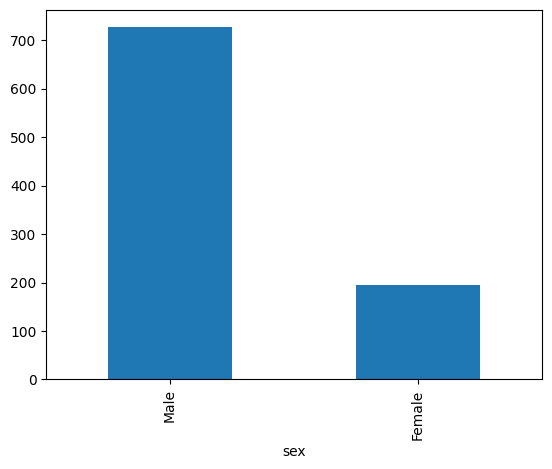

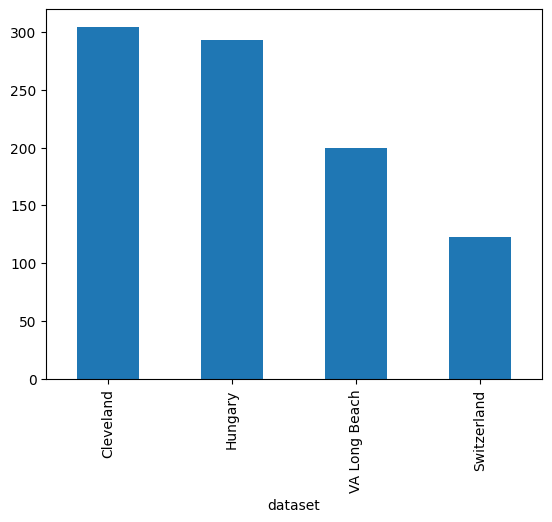

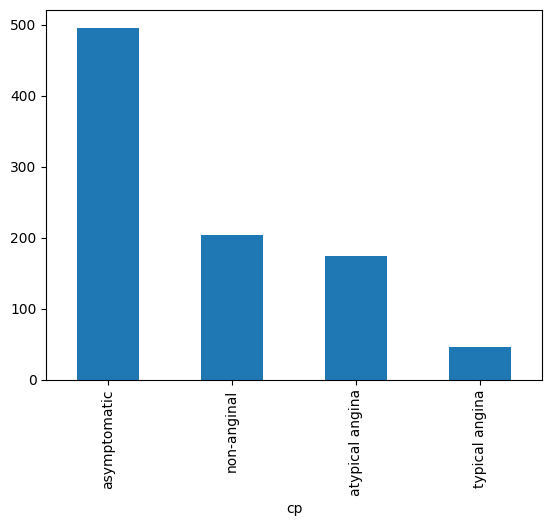

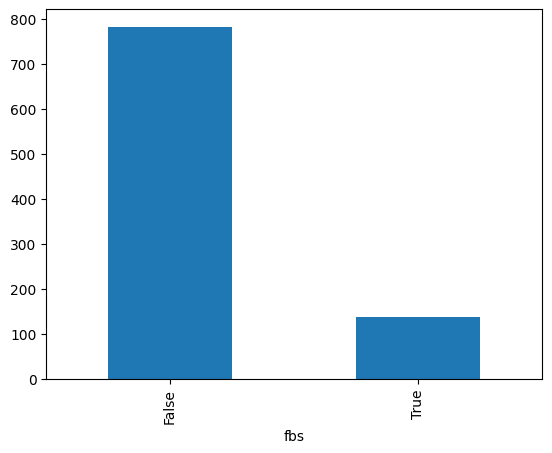

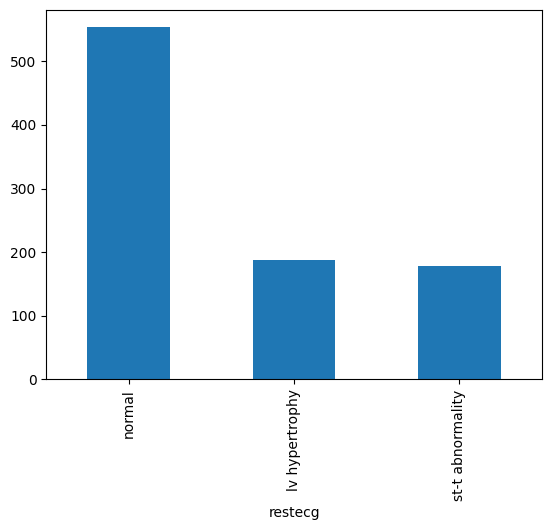

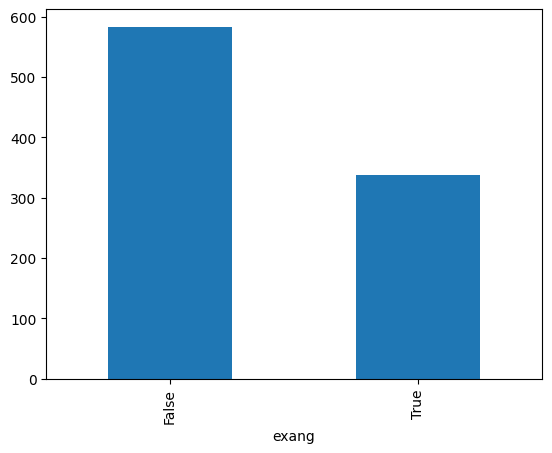

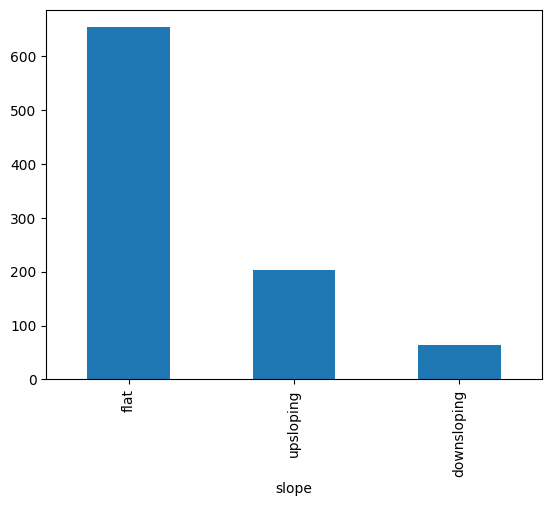

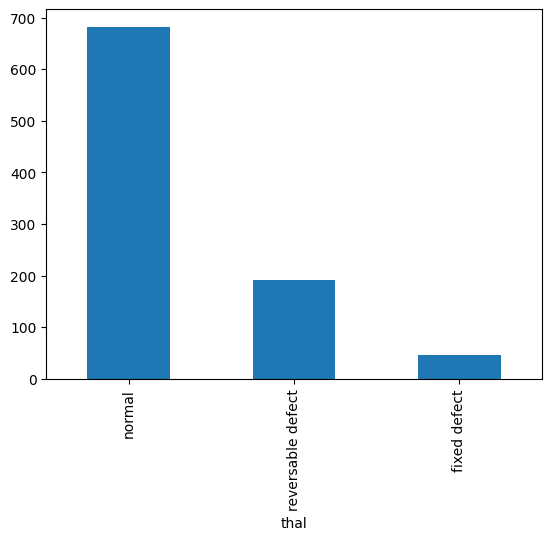

In [ ]:
for col in new_df.select_dtypes(['object', 'bool']).columns:
  new_df[col].value_counts().plot.bar()
  plt.show()

# Relationship between target and numerical features

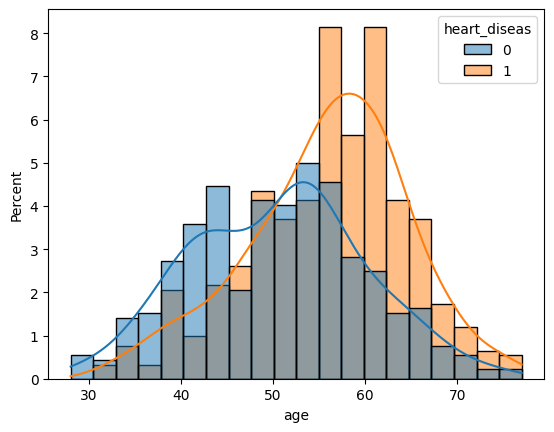

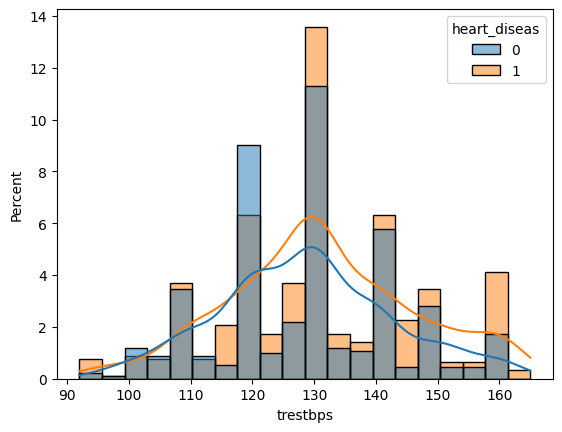

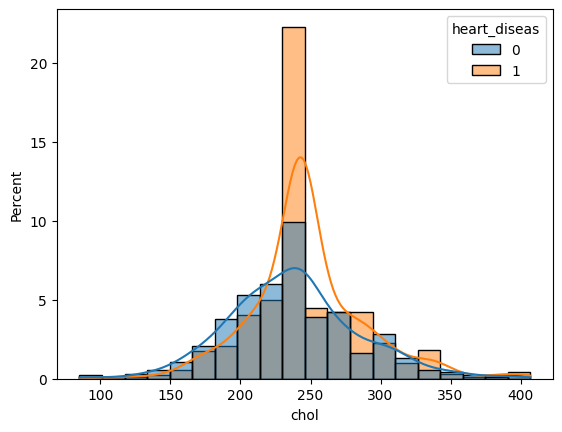

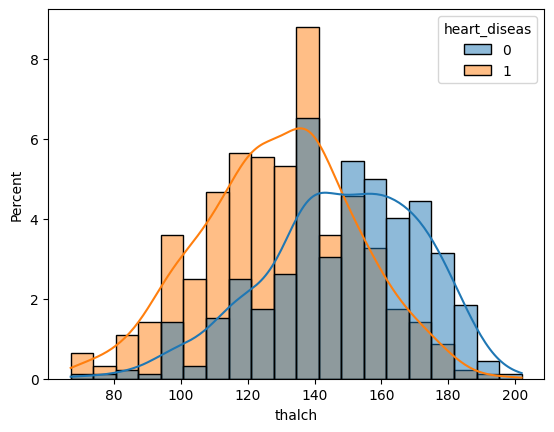

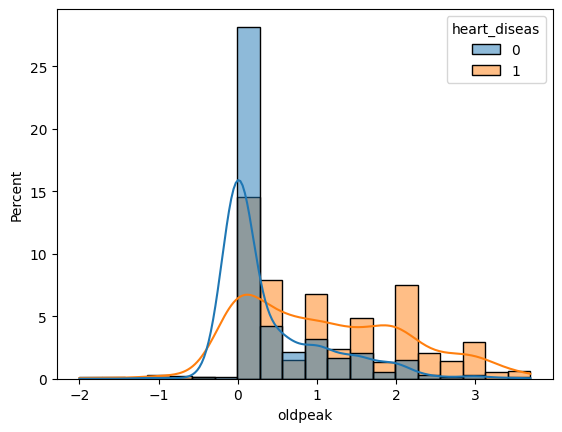

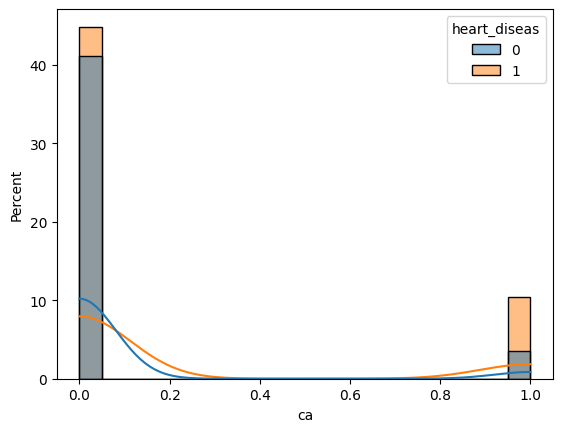

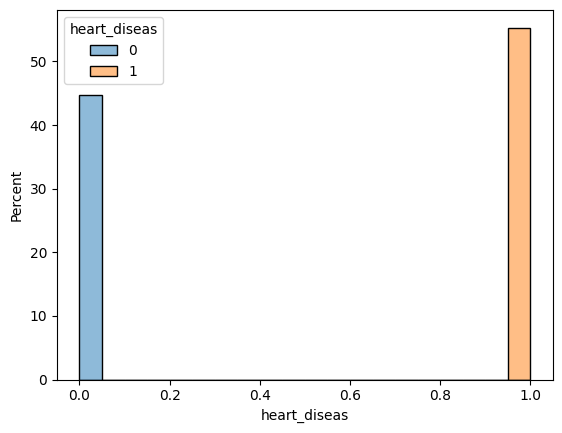

In [ ]:
for col in new_df.select_dtypes(['float', 'int']).columns:
  sns.histplot(new_df, x = col, hue = 'heart_diseas', stat='percent', bins=20, kde= True).set(label =col)
  plt.show()

# Relationship between target and categorical features

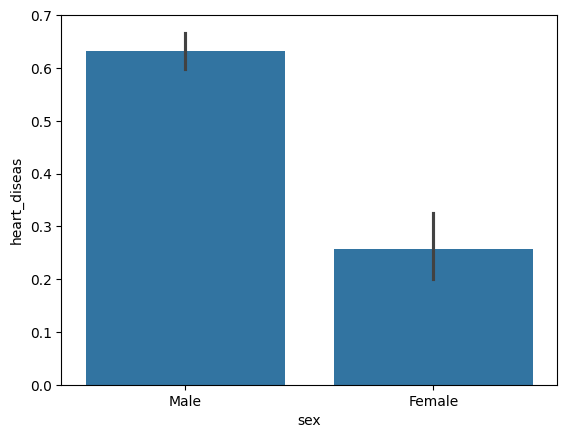

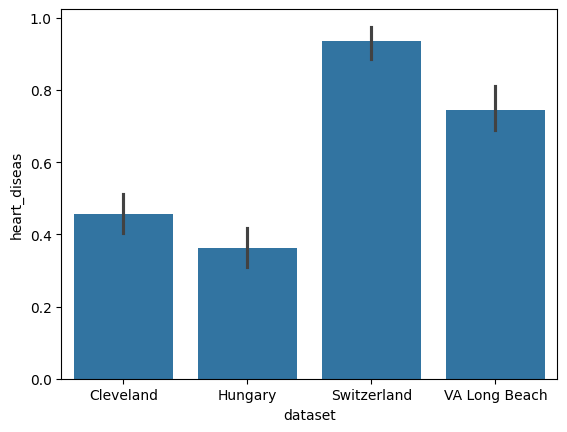

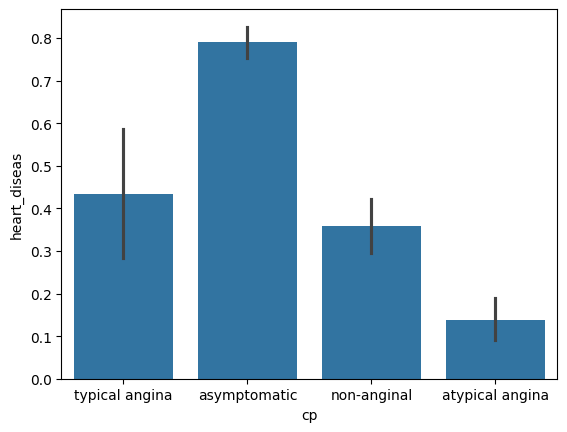

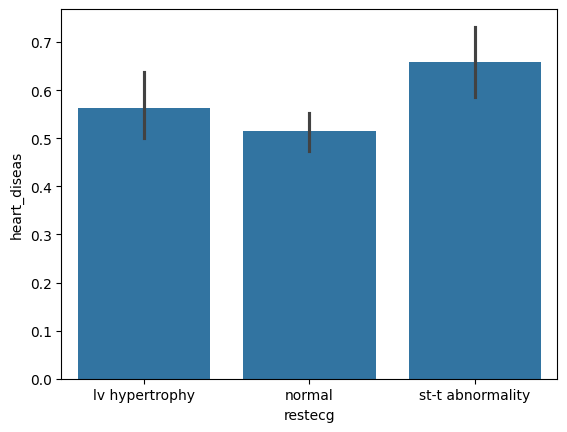

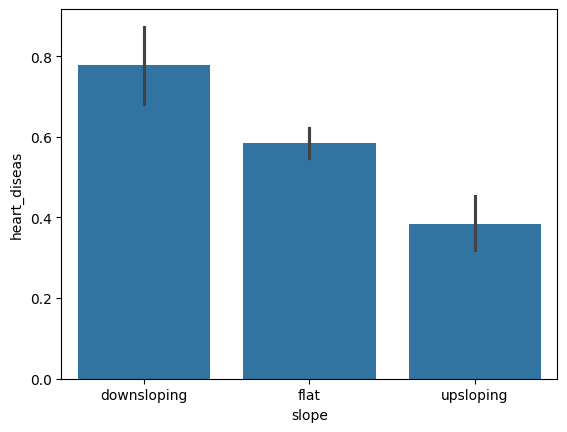

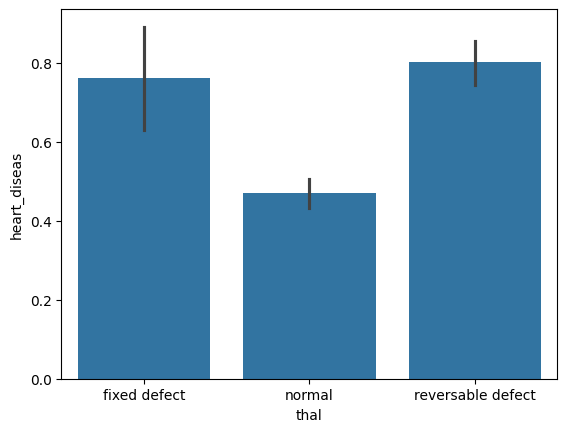

In [ ]:
for col in new_df.select_dtypes(['object']).columns:
  sns.barplot(new_df, x = col, y = 'heart_diseas').set(label =col)
  plt.show()

# Relationship between numerical features

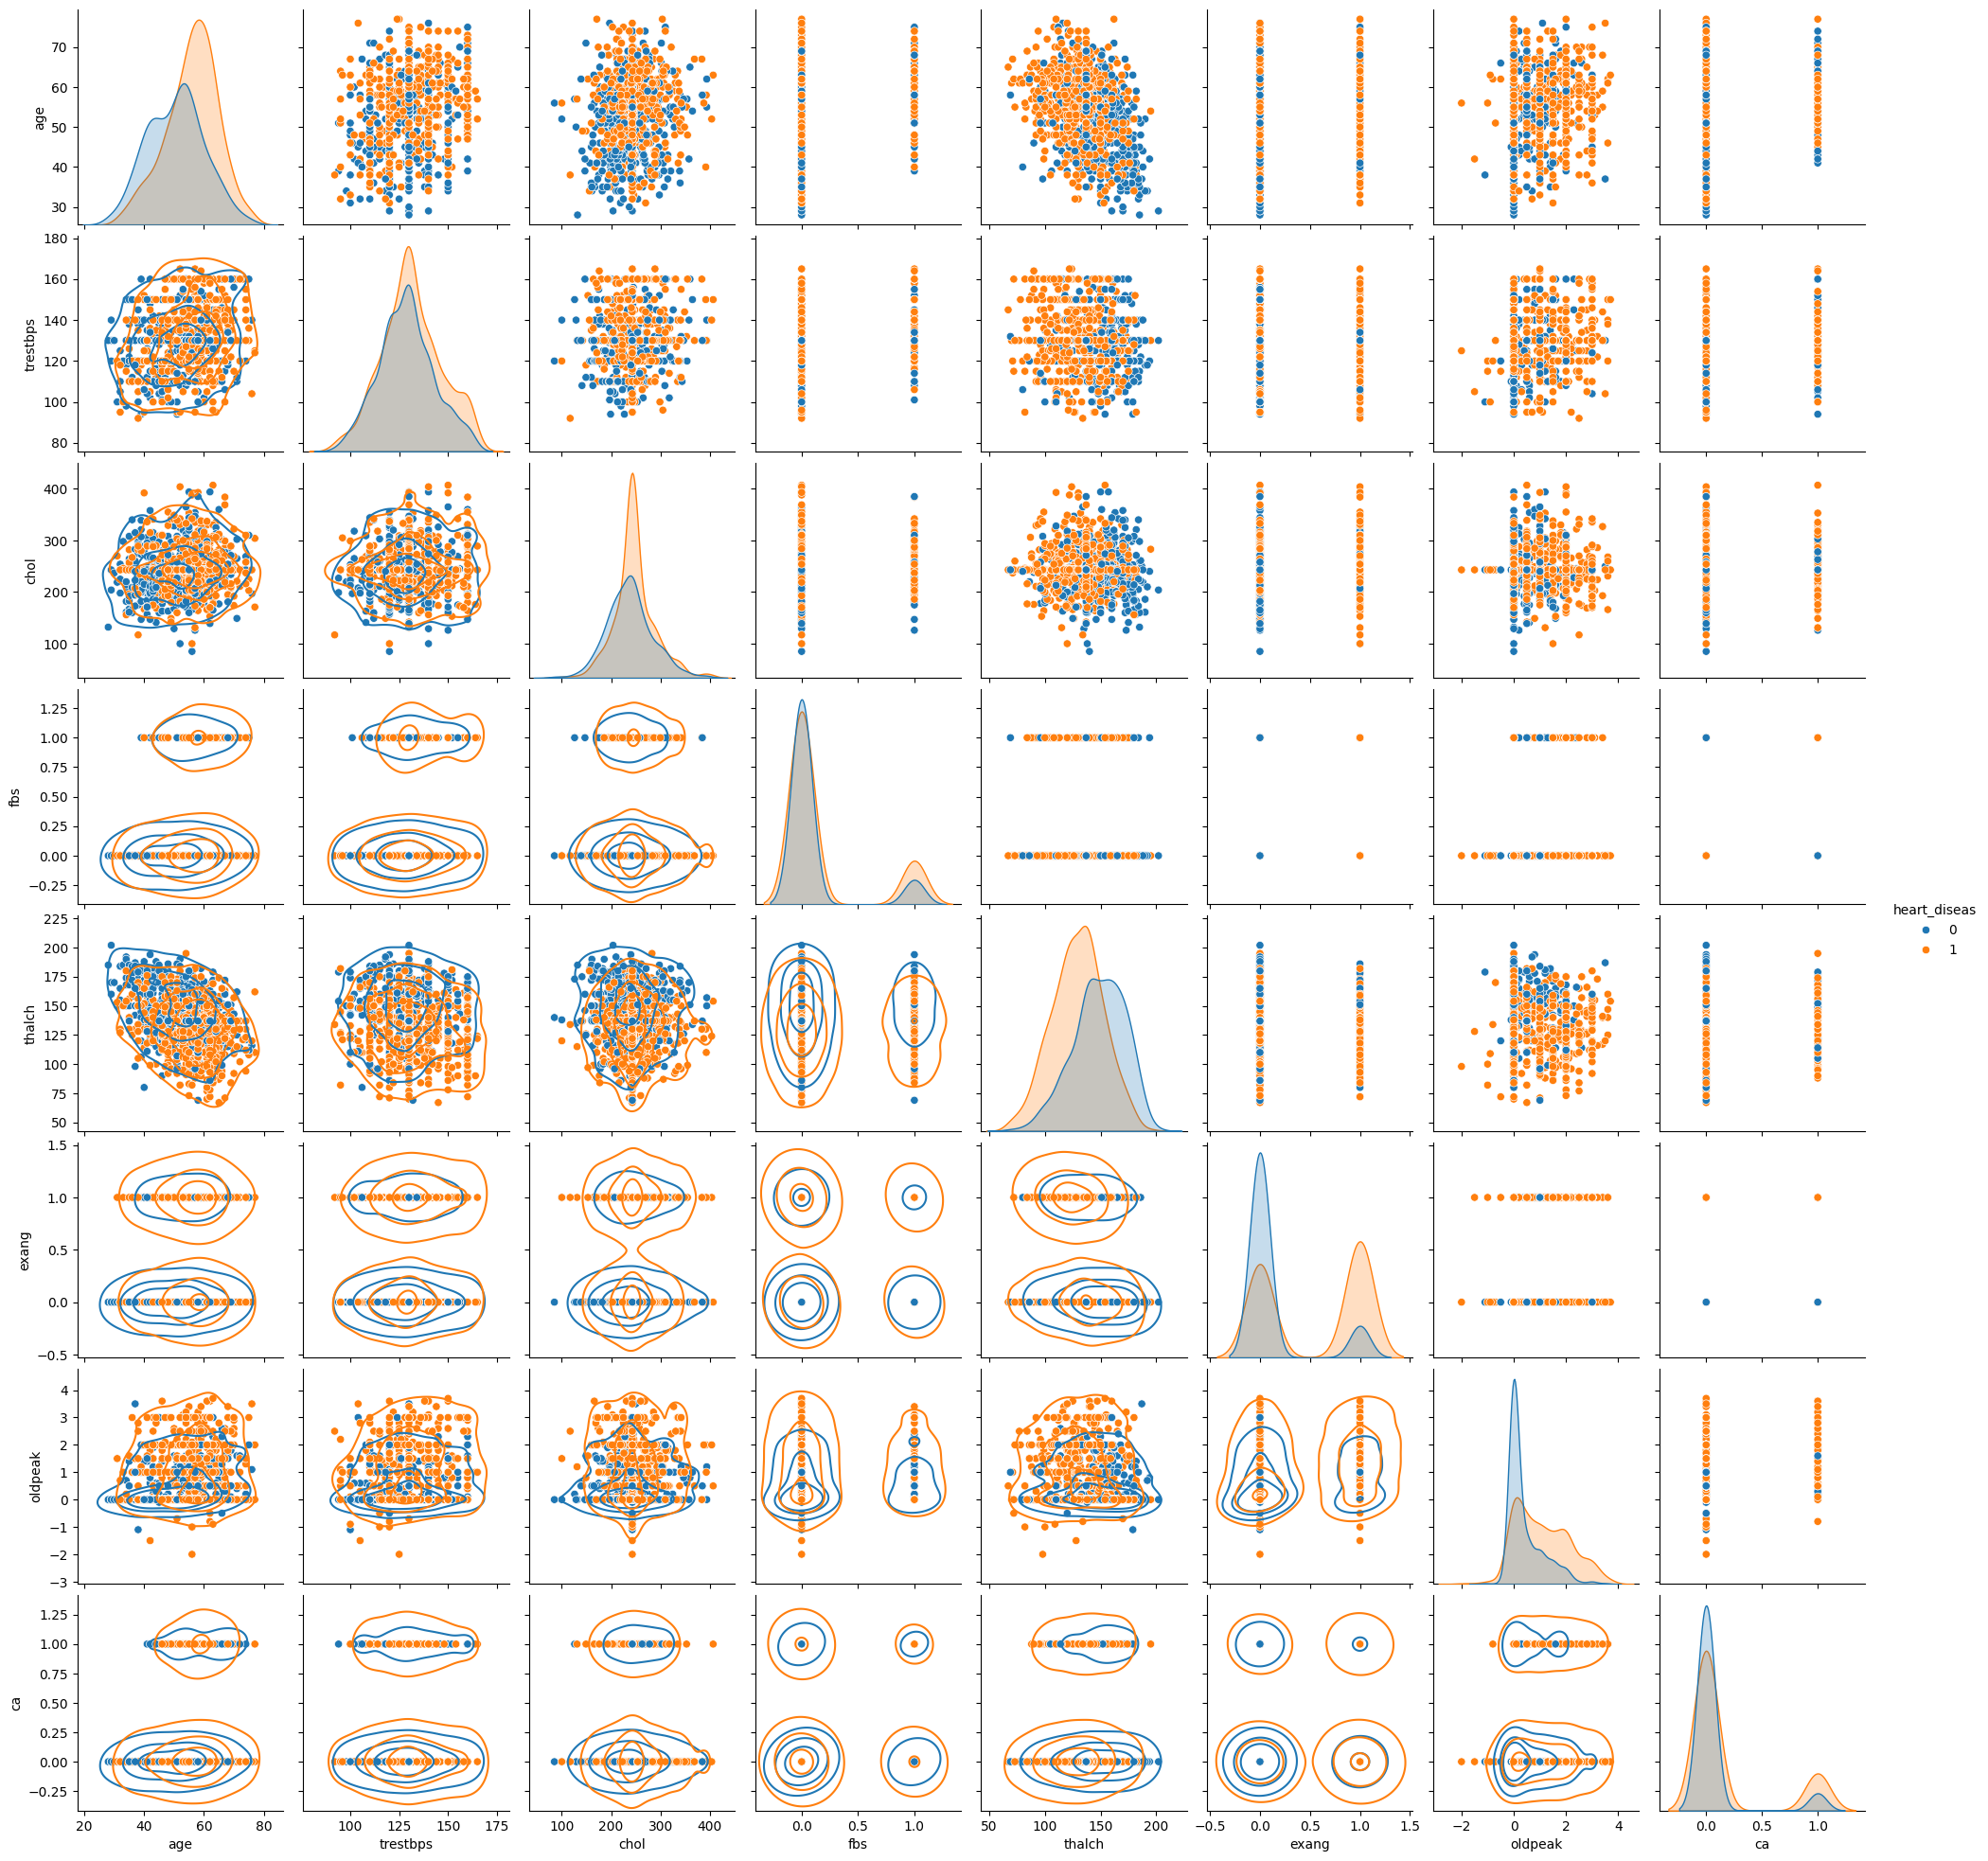

In [ ]:
p = sns.pairplot(new_df, hue='heart_diseas', kind= 'scatter', diag_kind='kde')
p.map_lower(sns.kdeplot, levels=4, color=".2")

# Multicollinearity check by correlation method





<Axes: >

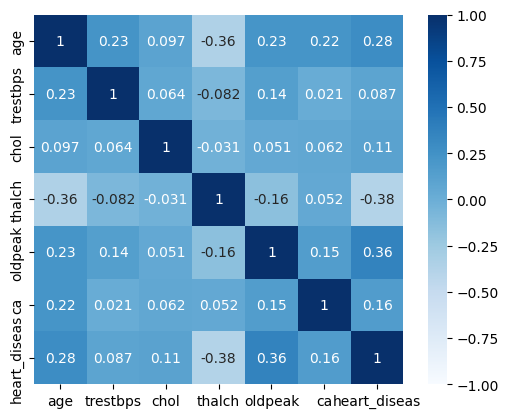

In [ ]:

corr_num = new_df.select_dtypes(['int', 'float']).corr()
sns.heatmap(corr_num, vmin=-1, vmax=1, cmap='Blues', annot=True, square= True)

# Feature engineering

The samples in the dataset feature are mapped to two country classes (America and Europe). In the slope feature two samples 'upslope' and 'flat' maped by one sample named by 'upslope or flat'. Features fbs, sex and exang rewrite based on the binary class.

In [ ]:
new_df = new_df.assign(dataset=new_df['dataset'].map({'Hungray':'Europe', 'Switzerland':'Europe', 'Cleveland':'America', 'VA Long Beach': 'America'}))
new_df = new_df.assign(slope = new_df['slope'].map({'upslping':'upslope or flat', 'flat':'upslope or flat', 'downsloping':'downsloping'}))
new_df['fbs'] = np.where(new_df['fbs'] == 'False', 0, 1)
new_df['sex'] = np.where(new_df['sex'] == 'Female', 0, 1)
new_df['exang'] = np.where(new_df['exang'] == 'False', 0, 1)


# Splitting the independent(inputs) and dependent(target) variables to train and test

In [ ]:
from sklearn.model_selection import train_test_split
features =['age',
           'sex',
           'dataset',
           'cp',
           'trestbps',
           'chol',
           'fbs',
            'restecg',
            'thalch',
            'exang',
            'oldpeak',
            'slope',
            'ca',
            'thal']


inputs = pd.get_dummies(new_df[features], drop_first =True, dtype= int)
target = new_df['heart_diseas']
x_train, x_test, y_train, y_test = train_test_split(inputs, target, train_size=0.8, random_state=2321)

# Scaling of training and test independent variables

In [ ]:
from sklearn.preprocessing import StandardScaler
sd_train = StandardScaler()
sd_test = StandardScaler()
sd_x_train = sd_train.fit_transform(x_train)
sd_x_test = sd_test.fit_transform(x_test)

# **K_nearest Modeling**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(sd_x_train, y_train)

print('training score:', knn.score(sd_x_train, y_train))
print('testing score:', knn.score(sd_x_test, y_test))

training score: 0.8586956521739131
testing score: 0.8260869565217391


No significant difference between training and testing scores indicates that overfitting has not occurred.

# Accuracy of model in train and test prediction
This helps us to identify whether or not overfitting has occurred by increasing the gap between training and test data.




In [ ]:
from sklearn.metrics import accuracy_score
y_pred_train = knn.predict(sd_x_train)
y_pred_test = knn.predict(sd_x_test)


print('accuracy of train prediction: ', round(accuracy_score(y_train, y_pred_train), 2))
print('accuracy of test prediction: ', round(accuracy_score(y_train, y_pred_train), 2))



accuracy of train prediction:  0.86
accuracy of test prediction:  0.86


# Confusion matrix for train and test prediction
The confusion matrix of both train and test show the good performance of model

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, knn.predict(sd_x_train))

array([[258,  62],
       [ 42, 374]])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, knn.predict(sd_x_test))

array([[66, 25],
       [ 7, 86]])

The predicted event rates closely match the actual event rates across different probability bins. This is an indication of the good performance of the model on the real data.

<Axes: xlabel='proba_predicted', ylabel='event_rate'>

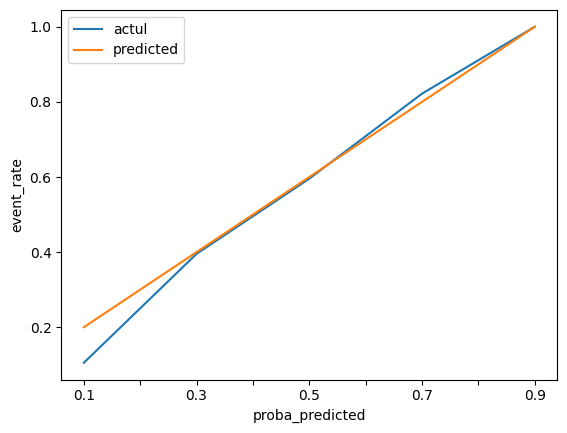

In [ ]:
bin = np.linspace(0, 1, 11)
actul_vs_prob = pd.DataFrame({'actul':np.reshape(y_train, -1), 'predicted': knn.predict_proba(sd_x_train)[:,1]})
actul_vs_prob['proba_predicted'] = pd.cut(actul_vs_prob['predicted'], bins= bin, labels= bin[:-1].round(2))
actul_vs_prob.groupby('proba_predicted', observed=True).agg({'actul':'mean', 'predicted':'mean'}).plot.line(ylabel='event_rate')

# Tuning the model
Tuning the k hyperparameters of the model using Gridsearch

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors': range(1, 200)}

grid = GridSearchCV(KNeighborsClassifier(), params)
grid.fit(sd_x_train, y_train)
grid.best_params_

{'n_neighbors': 64}

# Tuned KNN

Performance of model on both rain and test data that is well

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_tuned = KNeighborsClassifier(n_neighbors=64)
knn_tuned.fit(sd_x_train, y_train)

print('training score:', knn_tuned.score(sd_x_train, y_train))
print('testing score:', knn_tuned.score(sd_x_test, y_test))



training score: 0.8247282608695652
testing score: 0.8043478260869565


Accuracy of the model in predicting unseen data (test)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred_train = knn_tuned.predict(sd_x_train)
y_pred_test = knn_tuned.predict(sd_x_test)


print('accuracy of train prediction: ', round(accuracy_score(y_train, y_pred_train), 2))
print('accuracy of test prediction: ', round(accuracy_score(y_train, y_pred_train), 2))


accuracy of train prediction:  0.83
accuracy of test prediction:  0.83


Metrix parameters show that the performance of model is good.

In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
print('recall_score:', round(recall_score(y_train, knn_tuned.predict(sd_x_train)), 2))
print('precision_score:', round(precision_score(y_train, knn_tuned.predict(sd_x_train)),2))
print('accuracy_score', round(accuracy_score(y_train, knn_tuned.predict(sd_x_train)), 2))
print('f1_score:', round(f1_score(y_train, knn_tuned.predict(sd_x_train)), 2))

recall_score: 0.92
precision_score: 0.8
accuracy_score 0.82
f1_score: 0.86


The tuned KNN caused an increase in the recall score. This shows that the percentage of actual positive values by model is high, while the precision is relatively low (80%) which shows the accuracy of the positive predictions made by the model.

# **Logistic Regression model**

In [ ]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(max_iter=1000)
lgr.fit(sd_x_train, y_train)

print('training score:', lgr.score(sd_x_train, y_train))
print('testing score:', lgr.score(sd_x_test, y_test))

training score: 0.8233695652173914
testing score: 0.8315217391304348


# Score metrix


In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
print('recall_score:', round(recall_score(y_train, lgr.predict(sd_x_train)), 2))
print('precision_score:', round(precision_score(y_train, lgr.predict(sd_x_train)),2))
print('accuracy_score', round(accuracy_score(y_train, lgr.predict(sd_x_train)), 2))
print('f1_score:', round(f1_score(y_train, lgr.predict(sd_x_train)), 2))

recall_score: 0.86
precision_score: 0.84
accuracy_score 0.82
f1_score: 0.85


# Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, lgr.predict(sd_x_train))

array([[250,  70],
       [ 60, 356]])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, lgr.predict(sd_x_test))

array([[73, 18],
       [13, 80]])

# f1_score of soft probability

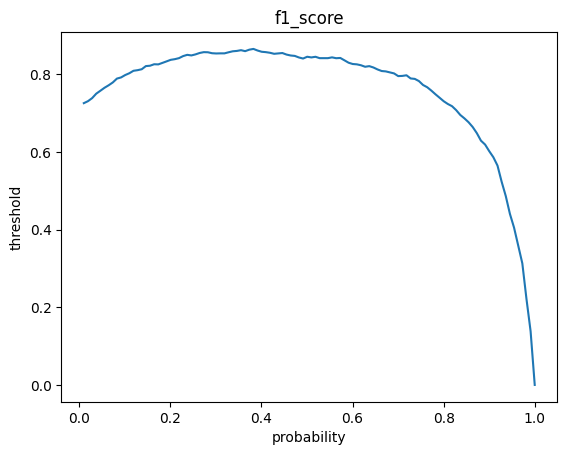

In [ ]:
pred_prob = lgr.predict_proba(sd_x_train)[:,1]
threshold = np.linspace(0.01, 1, 110)
f1score = [f1_score(y_train, (pred_prob >= threshold)) for threshold in threshold]
plt.plot(threshold, f1score)
plt.ylabel('threshold')
plt.xlabel('probability')
plt.title('f1_score')
plt.show()

In [ ]:
optimized_threshold = threshold[np.argmax(f1score)]
print(optimized_threshold)

0.38238532110091744


# Precision recall_curve
Optimizing model threshold by trade-off between precision and recall curve

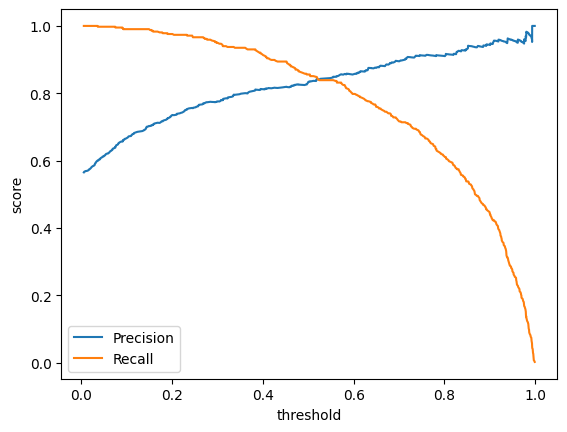

In [ ]:
from sklearn.metrics import precision_recall_curve
p_curve, r_curve, t_curve = precision_recall_curve(y_train, lgr.predict_proba(sd_x_train)[:, 1])
plt.plot(t_curve, p_curve[:-1],  label= 'Precision')
plt.plot(t_curve, r_curve[:-1],  label= 'Recall')
plt.legend()
plt.xlabel('threshold')
plt.ylabel('score')
plt.show()

# select optimized threshold
The comparison of the f1_score and precision-recall curve indicates that 0.52 is the optimal threshold, as it balances both recall and precision.

In [ ]:
optimized_thre = .52
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
print('recall_score:', round(recall_score(y_train, lgr.predict_proba(sd_x_train)[:,1]>optimized_thre), 2))
print('precision_score:', round(precision_score(y_train, lgr.predict_proba(sd_x_train)[:,1]>optimized_thre),2))
print('accuracy_score', round(accuracy_score(y_train, lgr.predict_proba(sd_x_train)[:,1]>optimized_thre), 2))
print('f1_score:', round(f1_score(y_train, lgr.predict_proba(sd_x_train)[:,1]> optimized_thre), 2))

recall_score: 0.84
precision_score: 0.84
accuracy_score 0.82
f1_score: 0.84


# Tuning logistic regression hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV
params ={'C':np.linspace(0.1, 1, 10), 'penalty':['l1', 'l2', 'elasticnet'], 'l1_ratio':np.linspace(0.1, 1, 10)}
#params ={'C':np.linspace(0.1, 1.1, 11), 'penalty':['l2']}

grid = GridSearchCV(LogisticRegression(solver='saga', max_iter=1000), params)
grid.fit(sd_x_train, y_train)
grid.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_

{'C': 0.1, 'l1_ratio': 0.4, 'penalty': 'elasticnet'}

In [ ]:
lgr_tuned = LogisticRegression(solver= 'saga', max_iter=1000, **grid.best_params_)
lgr_tuned.fit(sd_x_train, y_train)

print('training score:', lgr_tuned.score(sd_x_train, y_train))
print('testing score:', lgr_tuned.score(sd_x_test, y_test))

training score: 0.8206521739130435
testing score: 0.8260869565217391


# Score metrics

In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
print('recall_score:', round(recall_score(y_train, lgr_tuned.predict(sd_x_train)), 2))
print('precision_score:', round(precision_score(y_train, lgr_tuned.predict(sd_x_train)),2))
print('accuracy_score', round(accuracy_score(y_train, lgr_tuned.predict(sd_x_train)), 2))
print('f1_score:', round(f1_score(y_train, lgr_tuned.predict(sd_x_train)), 2))

recall_score: 0.87
precision_score: 0.83
accuracy_score 0.82
f1_score: 0.85


# ROC curve and AUC score
A curve close to the top left corner indicates a better performing model as it has a high TPR and low FPR.


Text(0.5, 0, 'false positive')

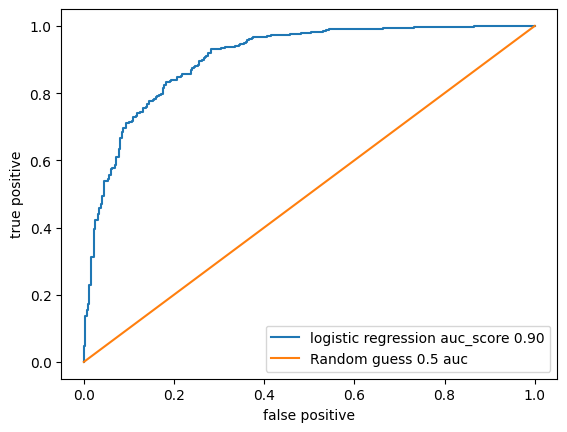

In [ ]:
from sklearn.metrics import roc_curve, auc
pred_prob = lgr.predict_proba(sd_x_train)[:, 1]
fpr, tpr, threshold = roc_curve(y_train, pred_prob)

auc_score = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'logistic regression auc_score {auc_score:.2f}')
plt.plot([0, 1], [0, 1], label ='Random guess 0.5 auc')
plt.legend()
plt.ylabel('true positive')
plt.xlabel('false positive')


#**Decision Tree Regression**

# Creating a model of decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(sd_x_train, y_train)

print('training score:', dt.score(sd_x_train, y_train))
print('testing score:', dt.score(sd_x_test, y_test))

training score: 0.8355978260869565
testing score: 0.7771739130434783


In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
print('recall_score:', round(recall_score(y_train, dt.predict(sd_x_train)), 2))
print('precision_score:', round(precision_score(y_train, dt.predict(sd_x_train)),2))
print('accuracy_score', round(accuracy_score(y_train, dt.predict(sd_x_train)), 2))
print('f1_score:', round(f1_score(y_train, dt.predict(sd_x_train)), 2))

recall_score: 0.93
precision_score: 0.81
accuracy_score 0.84
f1_score: 0.86


# confusion matrix
1.   train




In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, dt.predict(sd_x_train))

array([[228,  92],
       [ 29, 387]])




2.   test



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, dt.predict(sd_x_test))

array([[56, 35],
       [ 6, 87]])

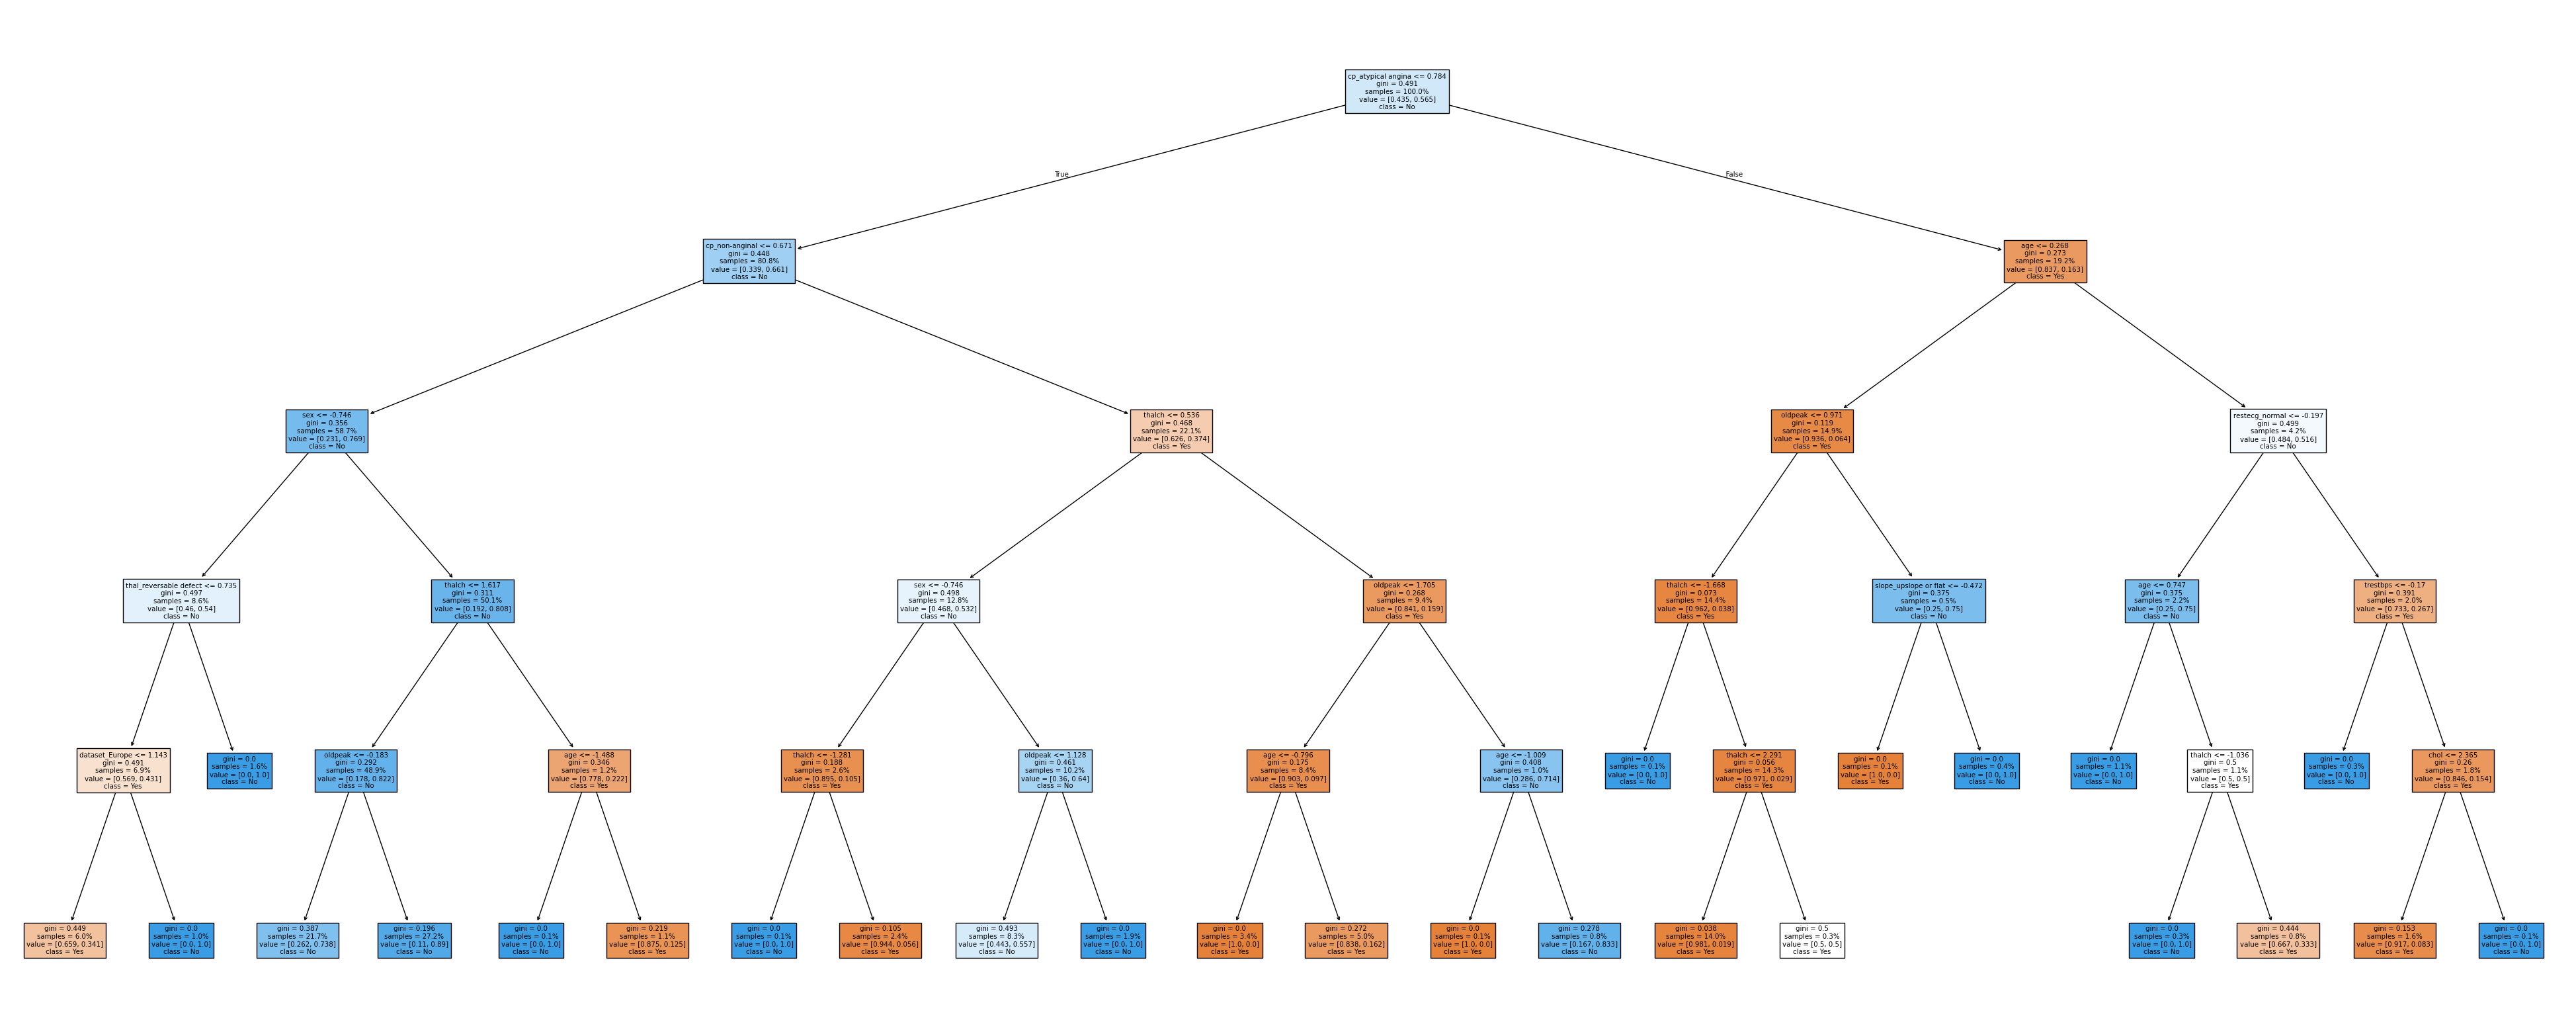

In [ ]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(50, 20))
plot_tree(dt, feature_names=x_train.columns, class_names=['Yes', 'No'], impurity= True, proportion= True, filled=True)
plt.show()

# Data frame of feature importance before tuning

In [ ]:
sorted(dt.feature_importances_)[::-1]
feature_importance = (pd.DataFrame({'feature':x_train.columns, 'importance':dt.feature_importances_})).sort_values('importance', ascending = False)
feature_importance

feature  importance
10        cp_atypical angina    0.303259
11            cp_non-anginal    0.197856
5                     thalch    0.124551
7                    oldpeak    0.093044
1                        sex    0.088152
0                        age    0.081945
17    thal_reversable defect    0.033778
9             dataset_Europe    0.028213
13            restecg_normal    0.019450
2                   trestbps    0.013346
3                       chol    0.008341
15     slope_upslope or flat    0.008066
6                      exang    0.000000
8                         ca    0.000000
4                        fbs    0.000000
12         cp_typical angina    0.000000
14  restecg_st-t abnormality    0.000000
16               thal_normal    0.000000

# Pre-tuning features importance plot

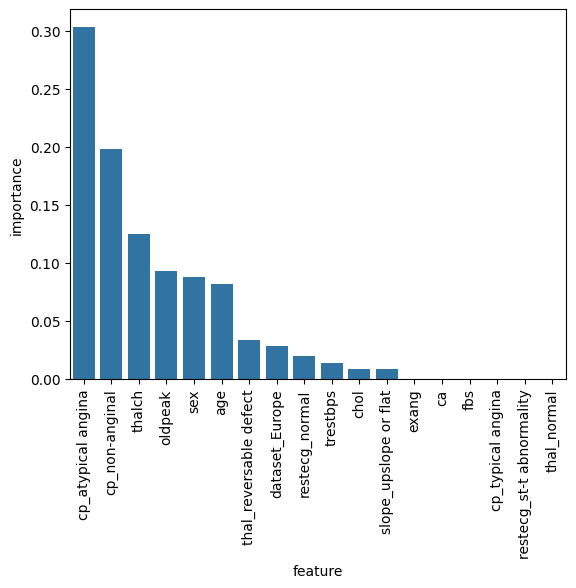

In [ ]:
sns.barplot(x= feature_importance['feature'], y=feature_importance['importance'])
plt.xticks(rotation=90)
plt.show()

# Tuning hyperparameters of decision tree classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
params ={'max_depth':[5, 10, 15, 20, 30], 'min_samples_leaf':[5, 10, 15, 20], 'criterion':['entropy', 'gini', 'log_loos']}

grid = GridSearchCV(DecisionTreeClassifier(), params)
grid.fit(sd_x_train, y_train)
grid.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5}

# Accuracy of model on train and test data

It seems the performance of model on the test data is not good.

In [ ]:
dt_tuned = DecisionTreeClassifier(**grid.best_params_)
dt_tuned.fit(sd_x_train , y_train)

print('training score:', dt_tuned.score(sd_x_train, y_train))
print('testing score:', dt_tuned.score(sd_x_test, y_test))

training score: 0.8220108695652174
testing score: 0.7771739130434783


In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
print('recall_score:', round(recall_score(y_train, dt_tuned.predict(sd_x_train)), 2))
print('precision_score:', round(precision_score(y_train, dt_tuned.predict(sd_x_train)),2))
print('accuracy_score', round(accuracy_score(y_train, dt_tuned.predict(sd_x_train)), 2))
print('f1_score:', round(f1_score(y_train, dt_tuned.predict(sd_x_train)), 2))

recall_score: 0.92
precision_score: 0.8
accuracy_score 0.82
f1_score: 0.85


# tuned_feature_importance

In [ ]:
tuned_feature_importance = (pd.DataFrame({'feature':x_test.columns, 'importance': dt_tuned.feature_importances_})).sort_values('importance', ascending=False)
tuned_feature_importance

feature  importance
10        cp_atypical angina    0.322464
11            cp_non-anginal    0.210385
5                     thalch    0.112937
7                    oldpeak    0.093807
1                        sex    0.093734
0                        age    0.074485
17    thal_reversable defect    0.040364
9             dataset_Europe    0.029999
13            restecg_normal    0.020682
2                   trestbps    0.001144
6                      exang    0.000000
8                         ca    0.000000
4                        fbs    0.000000
3                       chol    0.000000
12         cp_typical angina    0.000000
14  restecg_st-t abnormality    0.000000
15     slope_upslope or flat    0.000000
16               thal_normal    0.000000

# tuned_feature_importance plot

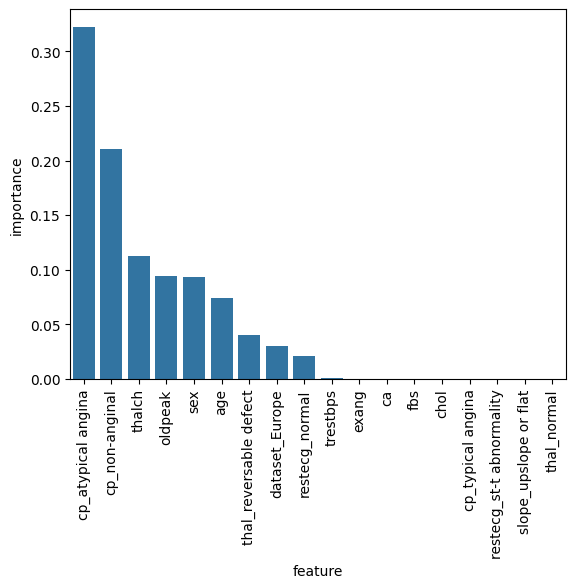

In [ ]:
sns.barplot(x= tuned_feature_importance['feature'], y=tuned_feature_importance['importance'])
plt.xticks(rotation=90)
plt.show()

# Confusion matrix after the tuning
1.   train




In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, dt.predict(sd_x_train))

array([[228,  92],
       [ 29, 387]])




2.   test



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, dt.predict(sd_x_test))

array([[56, 35],
       [ 6, 87]])

# Using the Class Weight to help balance
If we compare the accuracy result of the unbalanced and balanced class weights, we see that there is no difference between them only in the recall and precision score, which is so low. This shows that our data is not unbalanced.

In [ ]:
from sklearn.linear_model import LogisticRegression

lgr_balanced = LogisticRegression(class_weight='balanced', max_iter = 1000)
lgr_balanced.fit(sd_x_train, y_train)

print('training score:', lgr_balanced.score(sd_x_train, y_train))
print('testing score:', lgr_balanced.score(sd_x_test, y_test))

training score: 0.8233695652173914
testing score: 0.8532608695652174


# Accuracy of the model when the weight of the model is considered to be balanced

In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
print('recall_score:', round(recall_score(y_train, lgr_balanced.predict(sd_x_train)), 2))
print('precision_score:', round(precision_score(y_train, lgr_balanced.predict(sd_x_train)),2))
print('accuracy_score', round(accuracy_score(y_train, lgr_balanced.predict(sd_x_train)), 2))
print('f1_score:', round(f1_score(y_train, lgr_balanced.predict(sd_x_train)), 2))

recall_score: 0.83
precision_score: 0.85
accuracy_score 0.82
f1_score: 0.84


# Accuracy of the model when the weight of the model is considered to be automatic

In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
print('recall_score:', round(recall_score(y_train, lgr.predict(sd_x_train)), 2))
print('precision_score:', round(precision_score(y_train, lgr.predict(sd_x_train)),2))
print('accuracy_score', round(accuracy_score(y_train, lgr.predict(sd_x_train)), 2))
print('f1_score:', round(f1_score(y_train, lgr.predict(sd_x_train)), 2))

recall_score: 0.86
precision_score: 0.84
accuracy_score 0.82
f1_score: 0.85


# **Ensemble Model**

# Simple ensemble model



*   Simple hard ensemble




In [ ]:
from sklearn.ensemble import VotingClassifier
hard_ensem = VotingClassifier(estimators=([('knn_tuned', knn_tuned),('lgr_tuned', lgr_tuned) , ('dt_tuned', dt_tuned)]), voting= 'hard')
hard_ensem.fit(sd_x_train, y_train)

print('train score:', hard_ensem.score(sd_x_train, y_train))
print('test score:', hard_ensem.score(sd_x_test, y_test))

train score: 0.8369565217391305
test score: 0.8152173913043478




*   Simple soft ensemble



In [ ]:
from sklearn.ensemble import VotingClassifier
soft_ensem = VotingClassifier(estimators=([('knn_tuned', knn_tuned),('lgr_tuned', lgr_tuned) , ('dt_tuned', dt_tuned)]), voting= 'soft')
soft_ensem.fit(sd_x_train, y_train)

print('train score:', soft_ensem.score(sd_x_train, y_train))
print('test score:', soft_ensem.score(sd_x_test, y_test))

train score: 0.8505434782608695
test score: 0.8206521739130435


# Random forest
First, we use RandomisedSearch to obtain the promising range of parameters, which are then used in GridsearchCV.
It allows us to explore a wide range of hyperparameters quickly, which is useful when we have a large hyperparameter space and limited computational resources.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier(random_state=231, n_jobs= -1)
params = {'n_estimators':np.arange(start=100, stop=700, step=100),
           'max_features':[None, 'sqrt'],
           'bootstrap':[True, False],
           'max_samples':[None, .3, .5, .9],
           'max_depth':np.arange(start=1, stop=11, step=1),
           'min_samples_leaf':[10, 20, 50]}
grid = RandomizedSearchCV(rf, params, n_iter= 100, scoring= 'accuracy')
grid.fit(sd_x_train, y_train)
grid.best_params_


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
185 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
185 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 433, in fit
    raise ValueError(
ValueError: `max_sample` cannot be set if `bootstrap=False

{'n_estimators': 400,
 'min_samples_leaf': 10,
 'max_samples': 0.5,
 'max_features': 'sqrt',
 'max_depth': 5,
 'bootstrap': True}

In [ ]:
rf = RandomForestClassifier(random_state=2321, n_jobs=-1)
params= {'n_estimators':np.arange(start=350, stop=450, step=30),
         'max_features':['sqrt'],
         'bootstrap': [True],
         'max_samples': [0.8, 0.9,.98],
         'max_depth': [5, 10, 15],
         'min_samples_leaf': [5,10,15]}
grid = GridSearchCV(rf, params, scoring = 'accuracy')
grid.fit(sd_x_train, y_train)
grid.best_params_

{'bootstrap': True,
 'max_depth': 15,
 'max_features': 'sqrt',
 'max_samples': 0.9,
 'min_samples_leaf': 5,
 'n_estimators': 380}

In [ ]:
rf = RandomForestClassifier(random_state=2321, n_jobs=-1, **grid.best_params_)
rf.fit(sd_x_train, y_train)
print('training accuracy:', rf.score(sd_x_train, y_train))
print('testing accuracy:', rf.score(sd_x_test, y_test))

training accuracy: 0.8817934782608695
testing accuracy: 0.7989130434782609


# Metrics score

In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
print('recall_score:', round(recall_score(y_train, rf.predict(sd_x_train)), 2))
print('precision_score:', round(precision_score(y_train, rf.predict(sd_x_train)),2))
print('accuracy_score', round(accuracy_score(y_train, rf.predict(sd_x_train)), 2))
print('f1_score:', round(f1_score(y_train, rf.predict(sd_x_train)), 2))

recall_score: 0.93
precision_score: 0.87
accuracy_score 0.88
f1_score: 0.9


# Confusion matrix
1.   train




In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, rf.predict(sd_x_train))

array([[262,  58],
       [ 29, 387]])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, rf.predict(sd_x_test))

array([[65, 26],
       [11, 82]])

# Feature importance of random forest

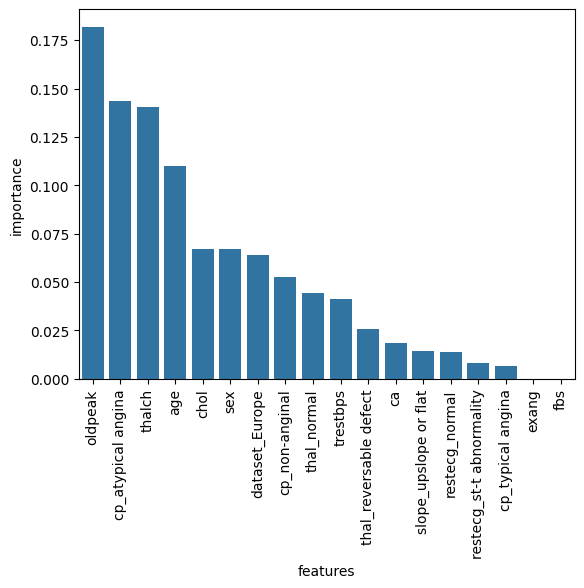

In [ ]:
feature_importance = pd.DataFrame({'features': x_test.columns, 'importance':rf.feature_importances_}).sort_values('importance', ascending=False)
sns.barplot(feature_importance, x= 'features', y='importance')
plt.xticks(rotation=90)
plt.ylabel('importance')
plt.xlabel('features')
plt.show()

# Gradient Boosting Machines

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

gbc = GradientBoostingClassifier(random_state=2123)
params = {'n_estimators': np.arange(start=100, stop= 1000, step= 100),
          'learning_rate':[0.02, 0.06, 0.08, 0.1, 0.4, 0.8],
          'subsample':[0.3, 0.6, 0.98],
          'max_features':[None, 'sqrt'],
          'max_depth':[5, 10, 15, 20],
          'min_samples_leaf':[5, 10, 15, 20]}

grid = RandomizedSearchCV(gbc, params, n_iter = 100, scoring='accuracy')
grid.fit(sd_x_train, y_train)
grid.best_params_

{'subsample': 0.3,
 'n_estimators': 800,
 'min_samples_leaf': 15,
 'max_features': 'sqrt',
 'max_depth': 10,
 'learning_rate': 0.06}

In [ ]:
from sklearn.model_selection import GridSearchCV
gbc = GradientBoostingClassifier(random_state=2123)
params={'n_estimators': np.arange(start=750, stop=850 , step= 20),
        'subsample': [.2, .5, .95],
        'learning_rate':[0.01, 0.02, 0.3],
        'max_features':['sqrt'],
        'min_samples_leaf':[10, 15, 20],
        'max_depth':[10, 15, 20]}

grid = GridSearchCV(gbc, params, scoring='accuracy')
grid.fit(sd_x_train, y_train)
grid.best_params_

{'learning_rate': 0.01,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 20,
 'n_estimators': 830,
 'subsample': 0.5}

# Tuned GBC

In [ ]:
tuned_gbc = GradientBoostingClassifier(random_state=2123, **grid.best_params_)

tuned_gbc.fit(sd_x_train, y_train)
print('train accuracy:', tuned_gbc.score(sd_x_train, y_train))
print('test accuracy:', tuned_gbc.score(sd_x_test, y_test))


train accuracy: 0.9089673913043478
test accuracy: 0.8260869565217391


In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
print('recall_score:', round(recall_score(y_train, tuned_gbc.predict(sd_x_train)), 2))
print('precision_score:', round(precision_score(y_train, tuned_gbc.predict(sd_x_train)),2))
print('accuracy_score', round(accuracy_score(y_train, tuned_gbc.predict(sd_x_train)), 2))
print('f1_score:', round(f1_score(y_train, tuned_gbc.predict(sd_x_train)), 2))

recall_score: 0.94
precision_score: 0.9
accuracy_score 0.91
f1_score: 0.92


# Confusion matrix after the tuning
1.   train




In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, tuned_gbc.predict(sd_x_train))

array([[278,  42],
       [ 25, 391]])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, tuned_gbc.predict(sd_x_test))

array([[70, 21],
       [11, 82]])

Feature importance by tuned gbc

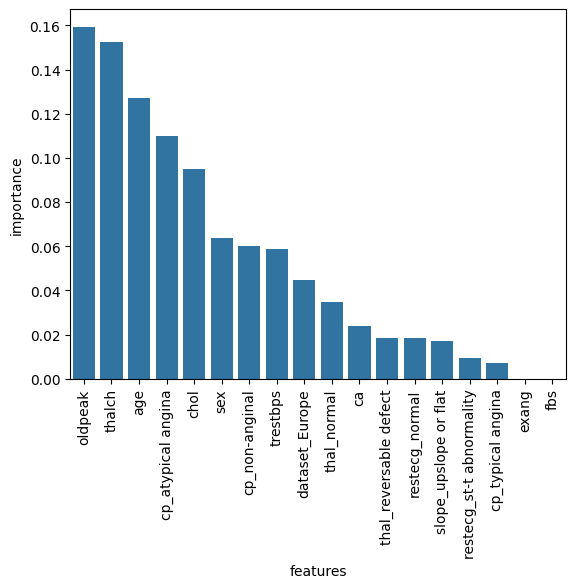

In [ ]:
feature_importance = pd.DataFrame({'features': x_test.columns, 'importance':tuned_gbc.feature_importances_}).sort_values('importance', ascending=False)
sns.barplot(feature_importance, x= 'features', y='importance')
plt.xticks(rotation=90)
plt.ylabel('importance')
plt.xlabel('features')
plt.show()

# comparing the result of tuned random forest and gradianet boost by roc_curve on training data

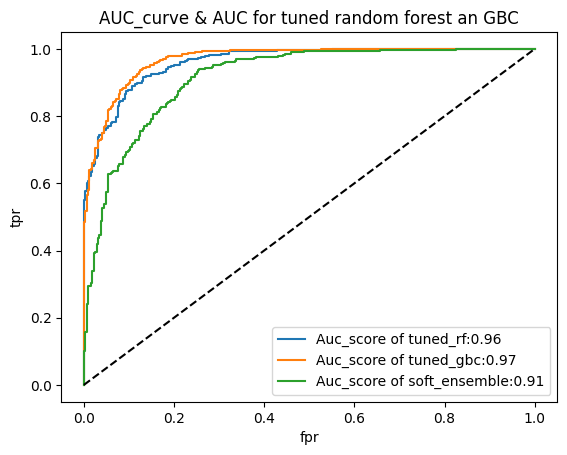

In [ ]:
from sklearn.metrics import roc_curve, auc

tpr1, fpr1, threshold = roc_curve(y_train, rf.predict_proba(sd_x_train)[:,1])
tpr2, fpr2, threshold = roc_curve(y_train, tuned_gbc.predict_proba(sd_x_train)[:,1])
tpr3, fpr3, threshold = roc_curve(y_train, soft_ensem.predict_proba(sd_x_train)[:,1])
auc_score1 = auc(tpr1, fpr1)
auc_score2 = auc(tpr2, fpr2)
auc_score3 = auc(tpr3, fpr3)

plt.plot(tpr1, fpr1, label= f'Auc_score of tuned_rf:{auc_score1:.2f}')
plt.plot(tpr2, fpr2, label = f'Auc_score of tuned_gbc:{auc_score2:0.2f}')
plt.plot(tpr3, fpr3, label = f'Auc_score of soft_ensemble:{auc_score3:0.2f}')
plt.plot([0,1], [0,1], 'k--')
plt.legend()
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('AUC_curve & AUC for tuned random forest an GBC')
plt.show()

# **Shap values**

# Shap values for GradientBoostingClassifier

In [ ]:
import shap
explainer = shap.Explainer(tuned_gbc)
shap_values_gbc = explainer(x_train.sample(100, random_state=2321))

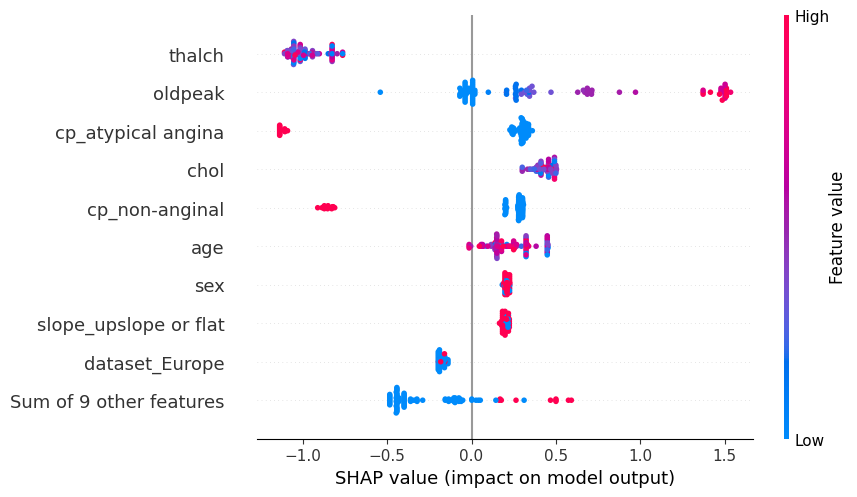

In [ ]:
shap.plots.beeswarm(shap_values_gbc)


# Shap values for random forest
Shap_values for no heart diseas or 0 class

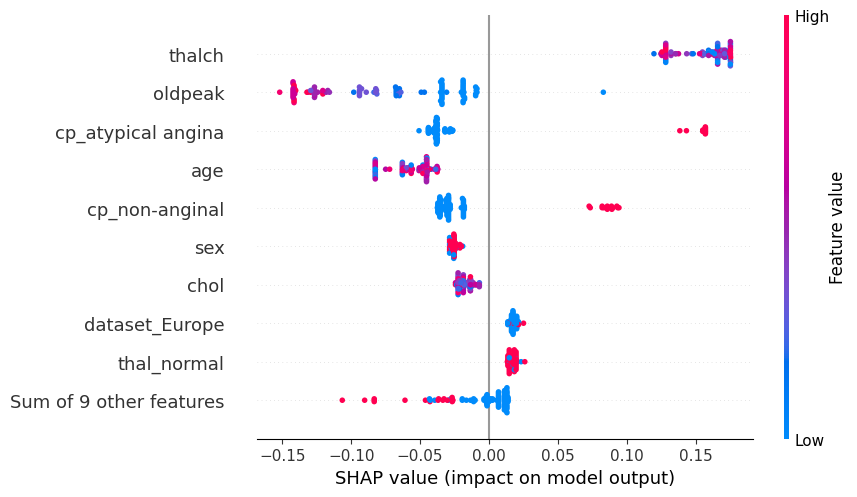

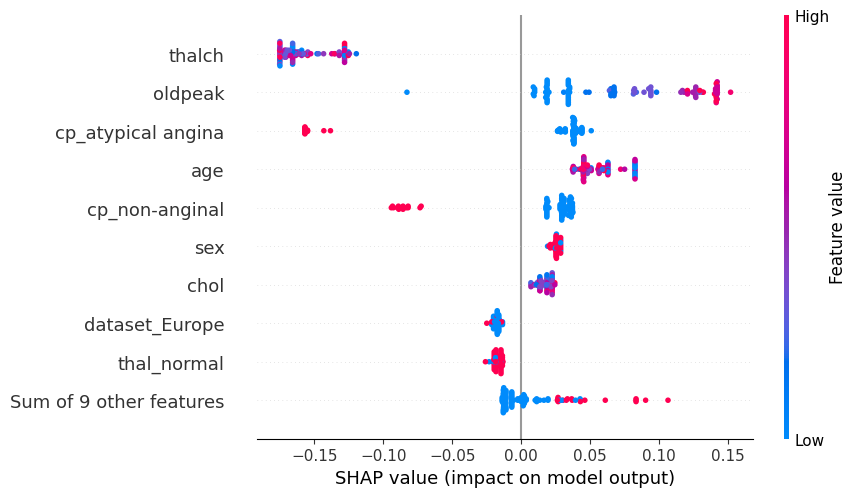

In [ ]:
explainer = shap.TreeExplainer(rf)
shap_values_rf = explainer(x_train.sample(100, random_state=2321))
shap_values_rf_0 = shap_values_rf[:,:,0]
shap_values_rf_1 = shap_values_rf[:,:,1]
shap.plots.beeswarm(shap_values_rf_0)
shap.plots.beeswarm(shap_values_rf_1)